# Demo: Unnecessarily complicated addition and subtraction of two digits

### Multi-input CNN; Task is to create a network that takes two input images and +/- operator and outputs the sum or difference of the two image labels.
 
 
 The goal is to present main components necessary for the task implementation.
 
 Demo notebook content
 
 1. Import necessary libraries and function from utils.py and DiffSuMNist script
 2. Show dataset images
 3. Model declaration
 4. Additional checks and inizializations
 5. Training a model
 5. Evaluating a model
 7. Error analysis (show wrong examples)
 

### Import libraries

In [1]:
from __future__ import print_function, division
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision
import torch.nn as nn
import torch.optim as optim
import time
from torch.autograd import Variable
import random
from matplotlib import pyplot as plt

In [3]:
from utils import download_dataset, show_batch, show
from DiffSuMNist import train_model, evaluate

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

## Show batch of images

In [6]:
trainset = torchvision.datasets.MNIST('./datasets/MNIST_data', train=True, download=True )
print('Length of training set ',len(trainset))
#download mnist validation dataset and sample it 
testset = torchvision.datasets.MNIST('./datasets/MNIST_data', train=False, download=True)
print('Length of testseting set ',len(testset))

Length of training set  60000
Length of testseting set  10000


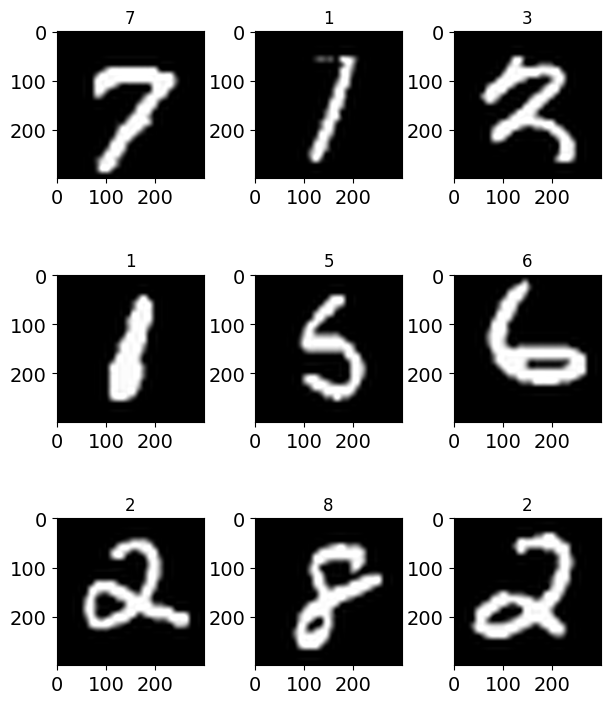

In [7]:
show_batch(trainset)

## Model definition 

In [8]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(5, 5), stride=(1, 1))
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(5, 5), stride=(1, 1))
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=(1, 1))
        self.relu = nn.ReLU(inplace=True)
        self.mp = nn.MaxPool2d(kernel_size=2, stride=2)
        self.l1 = nn.Linear(192, 1024)
        self.l2 = nn.Linear(1024, 19)

    def forward(self, x, y, operator):
        x = self.conv_layers1(x)
        y = self.conv_layers1(y)
        operator = self.conv_layers1(operator)
        x = self.conv_layers2(x)
        y = self.conv_layers2(y)
        operator = self.conv_layers2(operator)
        x = self.conv_layers3(x)
        y = self.conv_layers3(y)
        operator = self.conv_layers3(operator)
        N, _, _, _ = x.size()
        x = x.view(N, -1)
        y = y.view(N, -1)
        operator = operator.view(N, -1)
        z = torch.cat((x, y, operator), 1)
        z = self.l1(z)
        z = self.relu(z)
        z = self.l2(z)

        return z

    def conv_layers1(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.mp(x)
        return x

    def conv_layers2(self, x):
        x = self.conv2(x)
        x = self.relu(x)
        x = self.mp(x)
        return x

    def conv_layers3(self, x):
        x = self.conv3(x)
        x = self.relu(x)
        x = self.mp(x)
        return x

## Load batches of data



In [9]:
batch_size = 128
# Download mnist training dataset and create samples/batches
trainset = torchvision.datasets.MNIST('./datasets/MNIST_data', train=True, download=True,
                                      transform=transforms.ToTensor())
trainloader = DataLoader(trainset, batch_size=batch_size)

# download mnist validation dataset and sample it
testset = torchvision.datasets.MNIST('./datasets/MNIST_data', train=False, download=True,
                                     transform=transforms.ToTensor())
testloader = DataLoader(testset, batch_size=batch_size)

## Before starting training..

- create instance of model
- Check if GPU iz available
- define loss function
- define optimizer function
- create embeddings for operations + and -


In [10]:
# check if GPU is available
use_gpu = torch.cuda.is_available()
print('GPU available: ', use_gpu)

model = Model()
if use_gpu:
    model = model.cuda()

# define criterion and optimizer function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# create embedding for operators + and -
operators_embeddings = {'+': torch.rand([batch_size, 1, 28, 28]),
                        '-': torch.rand([batch_size, 1, 28, 28])}

GPU available:  True


## Train a model

In [11]:
trained_model, err_train, err_test, train_acc, test_acc = train_model(model, trainloader, testloader, 
                                                                      trainset, testset, 
                                                                      criterion, optimizer, use_gpu=use_gpu)

------------------------------
Epoch 1/20
------------------------------
train Loss: 0.0191 Acc: 0.1513
val Loss: 0.0138 Acc: 0.3060
------------------------------
Epoch 2/20
------------------------------
train Loss: 0.0101 Acc: 0.4215
val Loss: 0.0078 Acc: 0.4742
------------------------------
Epoch 3/20
------------------------------
train Loss: 0.0075 Acc: 0.4869
val Loss: 0.0071 Acc: 0.4808
------------------------------
Epoch 4/20
------------------------------
train Loss: 0.0068 Acc: 0.5119
val Loss: 0.0070 Acc: 0.4836
------------------------------
Epoch 5/20
------------------------------
train Loss: 0.0065 Acc: 0.5340
val Loss: 0.0069 Acc: 0.4856
------------------------------
Epoch 6/20
------------------------------
train Loss: 0.0062 Acc: 0.5546
val Loss: 0.0068 Acc: 0.4924
------------------------------
Epoch 7/20
------------------------------
train Loss: 0.0060 Acc: 0.5758
val Loss: 0.0069 Acc: 0.4954
------------------------------
Epoch 8/20
---------------------------

## Plot loss and accuraccy 

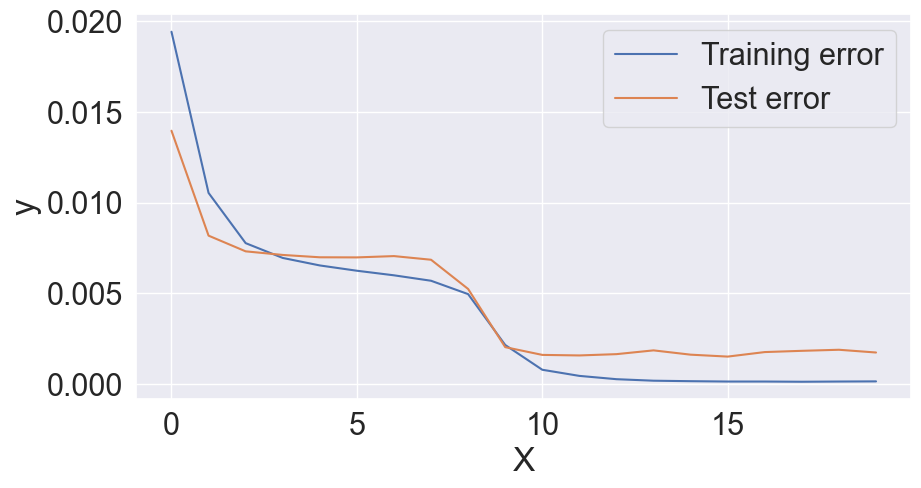

In [10]:
d = range(0, 20)
plt.figure(figsize=(10,5))
#plt.plot(err_train, err_test);
plt.plot(d, err_train, d, err_test);
plt.grid(), plt.xlabel('X'), plt.ylabel('y');
plt.legend(['Training error', 'Test error'], loc='best');

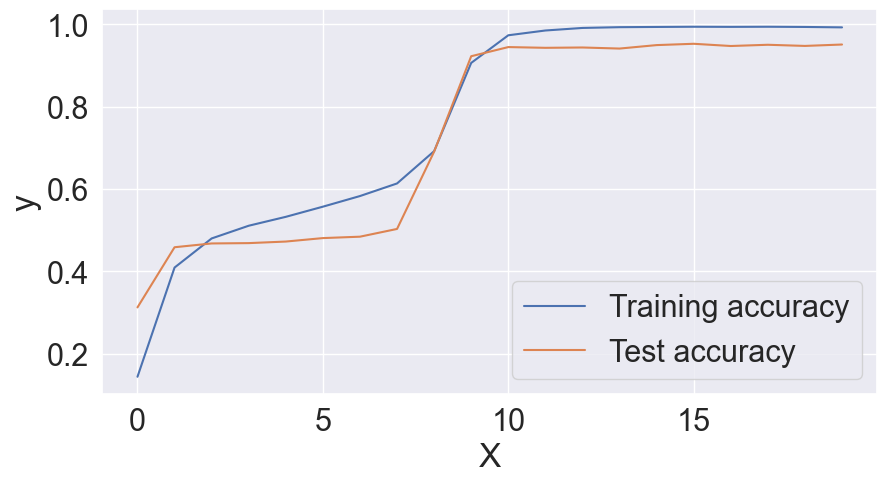

In [11]:
d = range(0, 20)
plt.figure(figsize=(10,5))
#plt.plot(err_train, err_test);
plt.plot(d, train_acc, d, test_acc);
plt.grid(), plt.xlabel('X'), plt.ylabel('y');
plt.legend(['Training accuracy', 'Test accuracy'], loc='best');

## Plot test images

len testloader 79
Substraction:4-7=-3


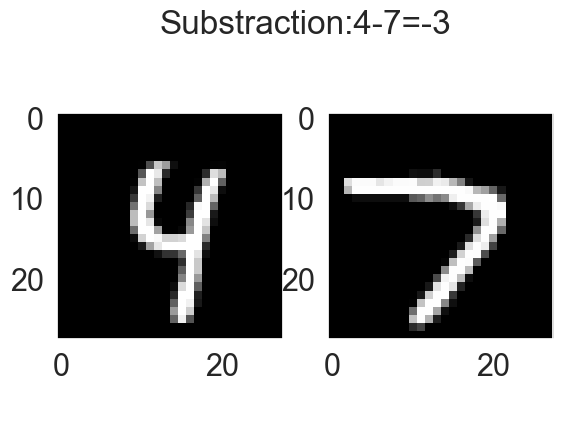

Addition:0+1=1


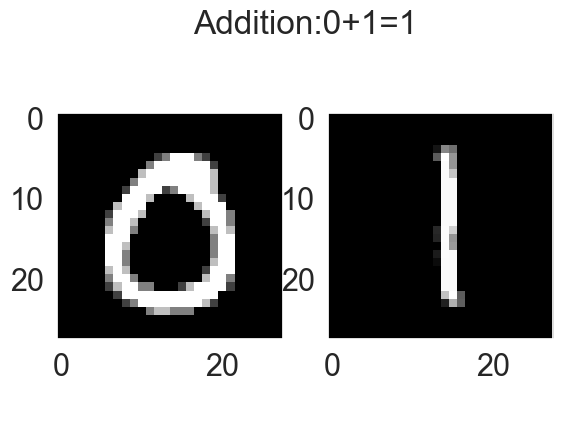

Addition:9+6=15


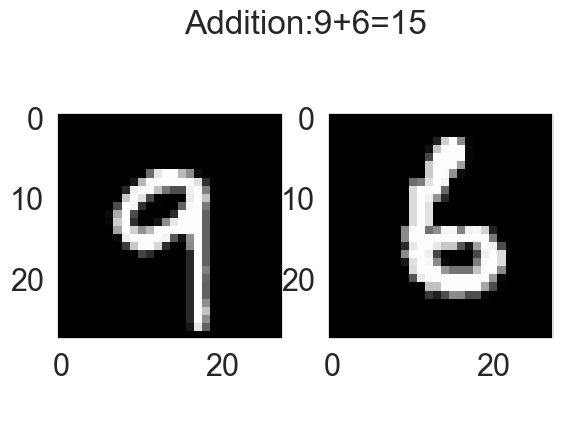

Substraction:0-5=-5


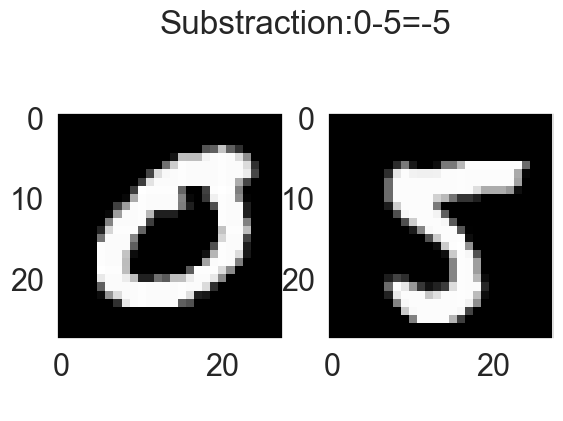

Substraction:4-5=-1


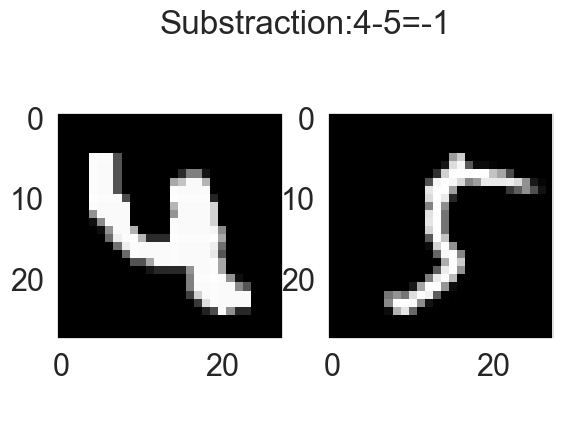

Substraction:8-1=7


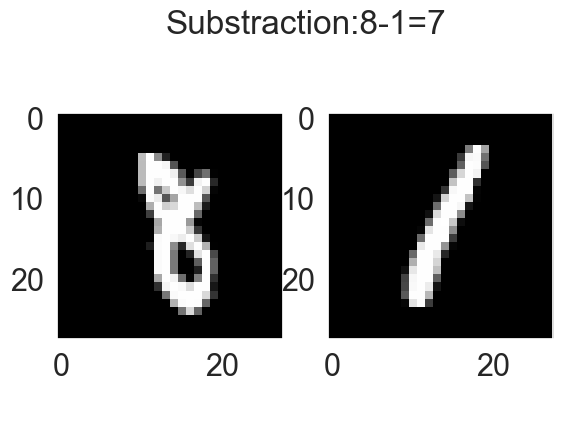

Substraction:6-9=-3


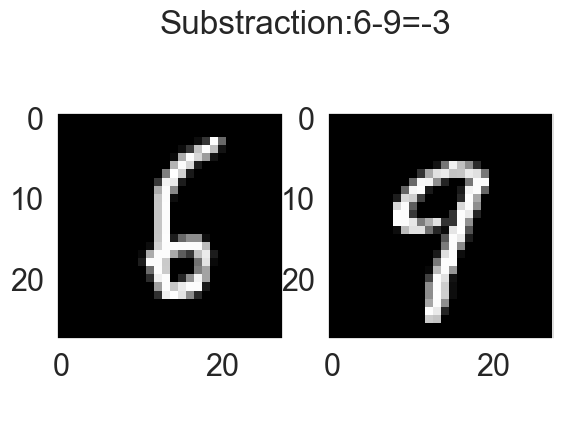

Substraction:1-8=-7


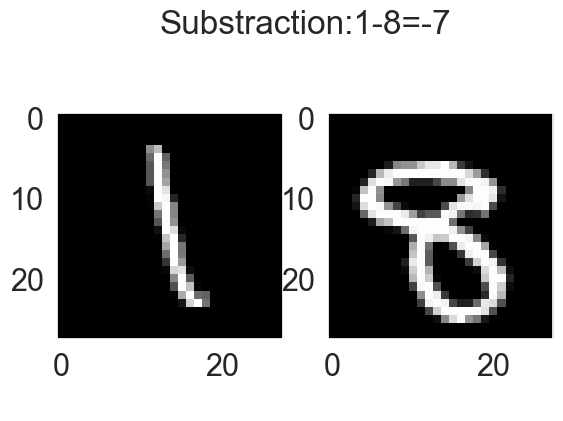

Substraction:1-4=-3


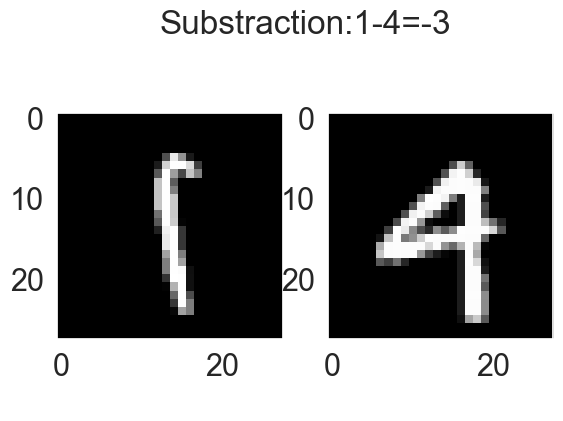

Substraction:0-7=-7


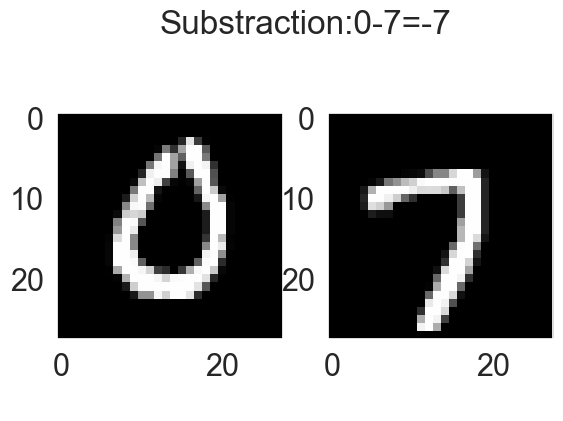

Substraction:2-2=0


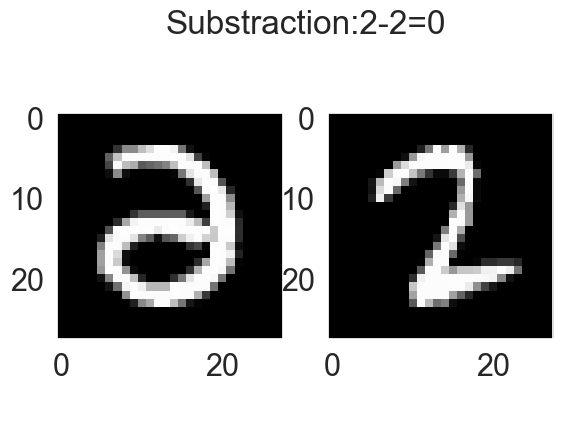

Addition:8+3=11


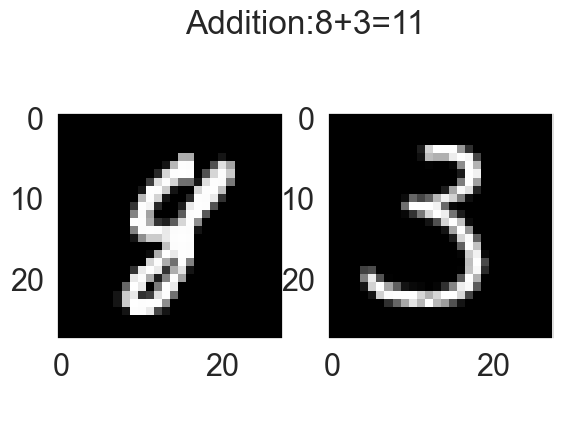

Substraction:6-6=0


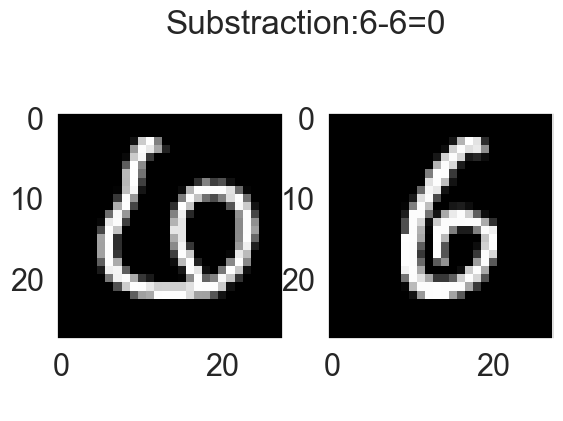

Substraction:6-3=3


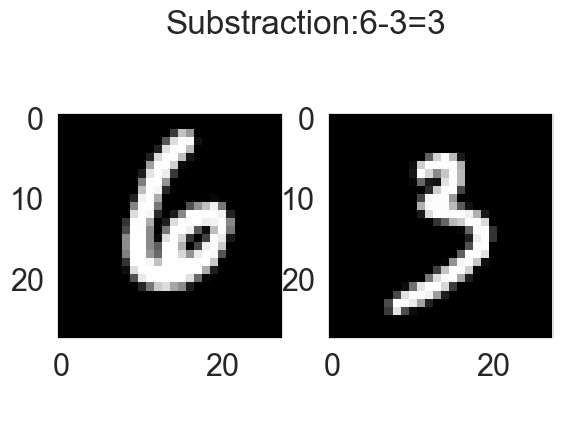

Substraction:0-4=-4


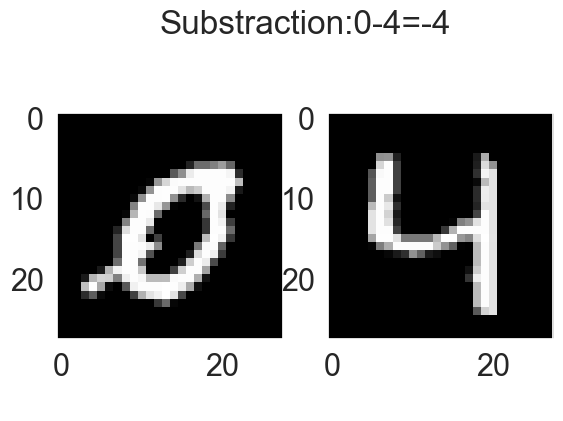

Addition:5+1=6


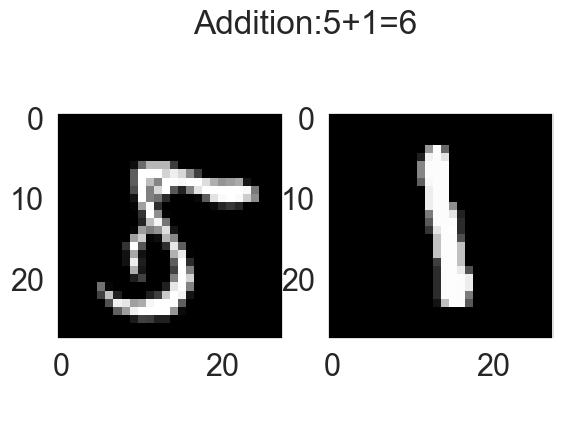

Addition:0+4=4


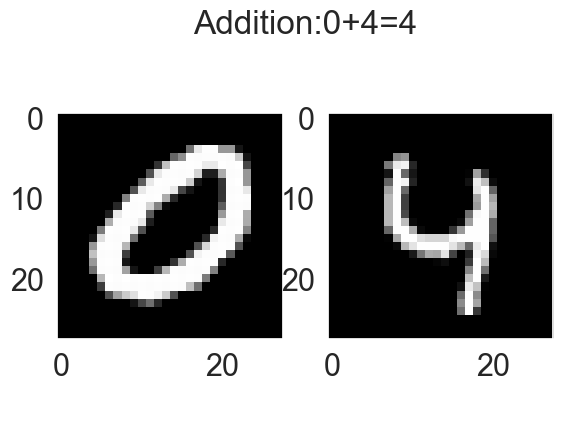

Addition:8+6=14


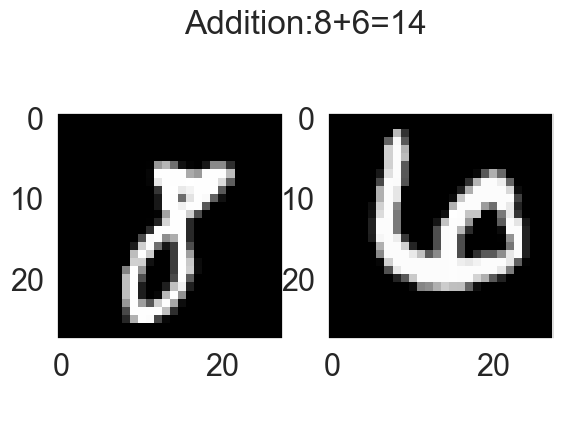

Substraction:7-6=1


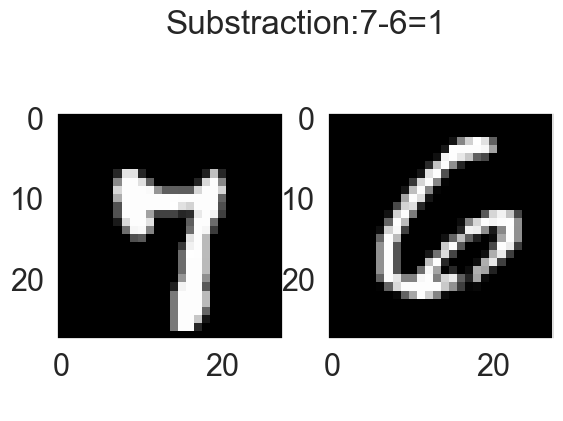

Substraction:0-2=-7


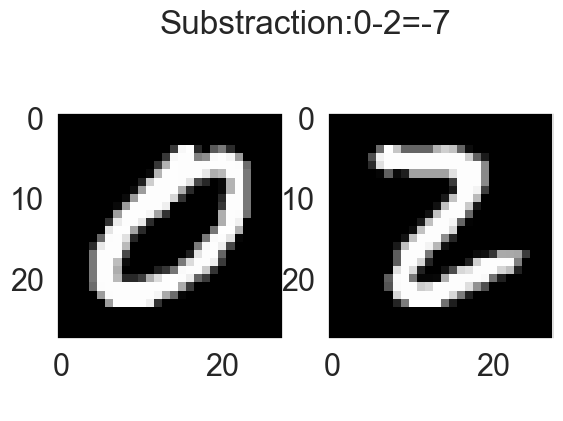

Addition:0+7=7


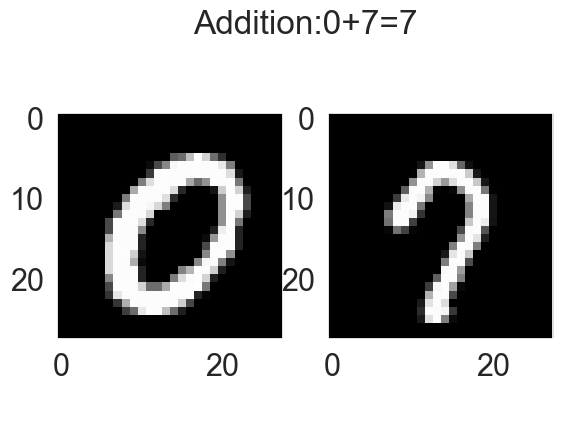

Substraction:3-1=2


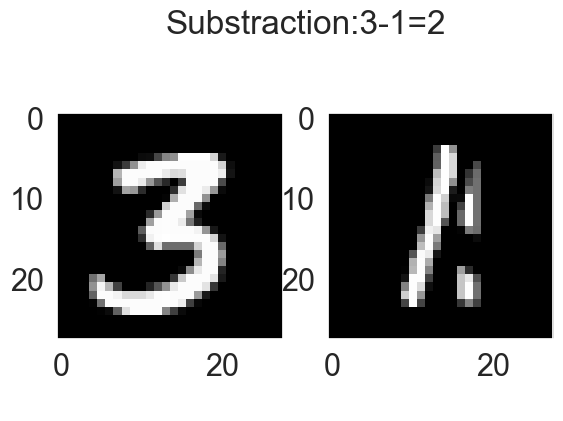

Addition:8+6=14


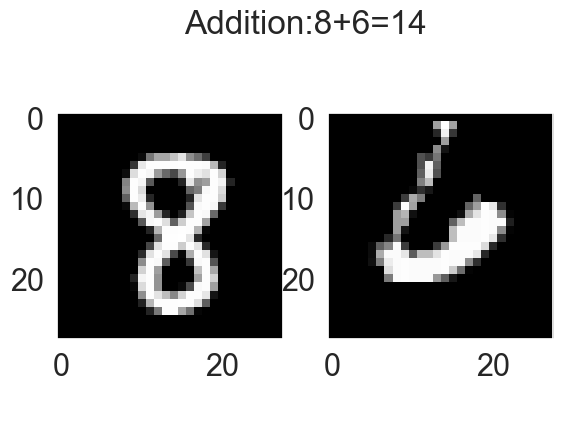

Addition:5+7=12


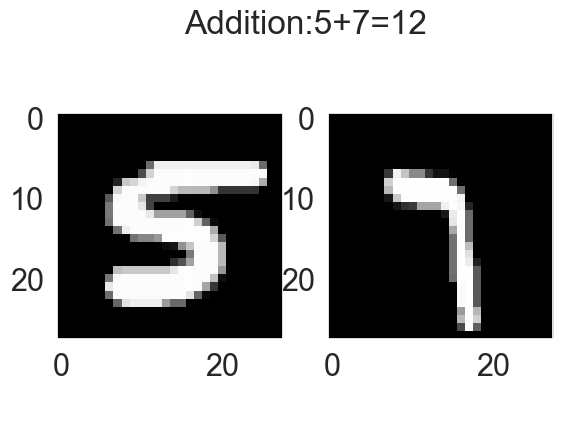

Substraction:6-5=1


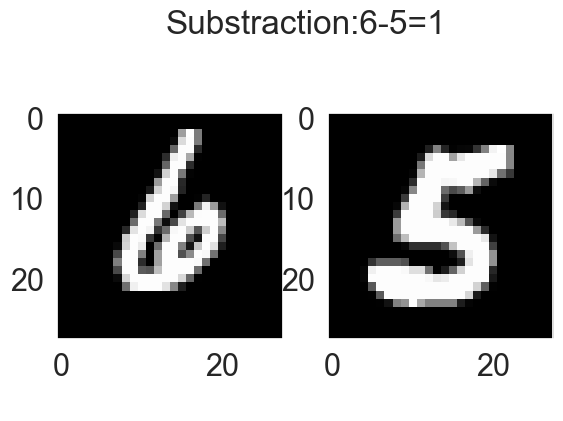

Addition:6+1=7


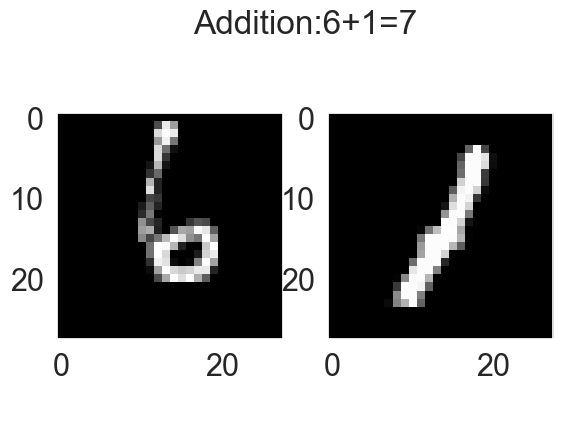

Substraction:9-4=5


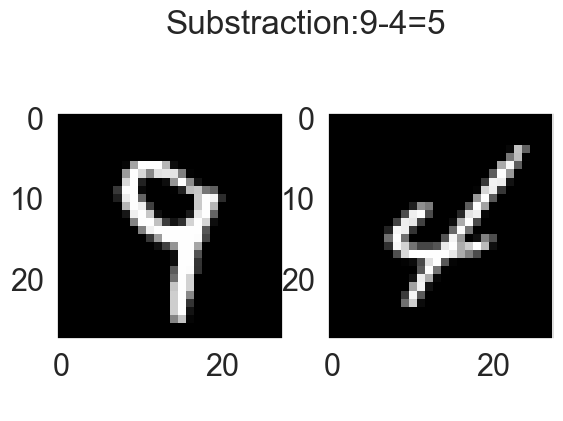

Substraction:8-5=3


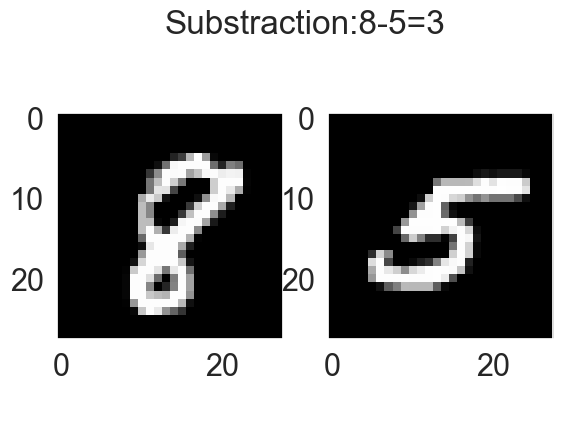

Substraction:0-2=-2


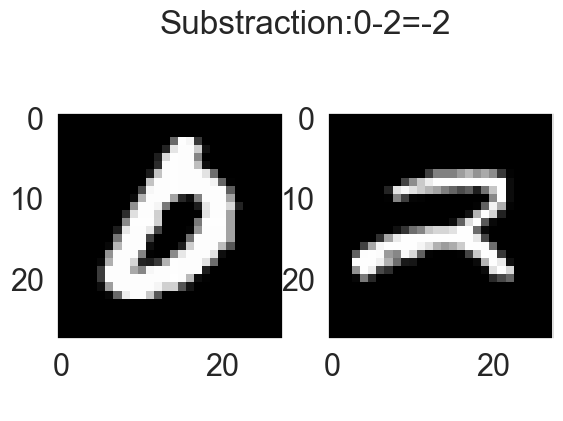

Addition:6+6=12


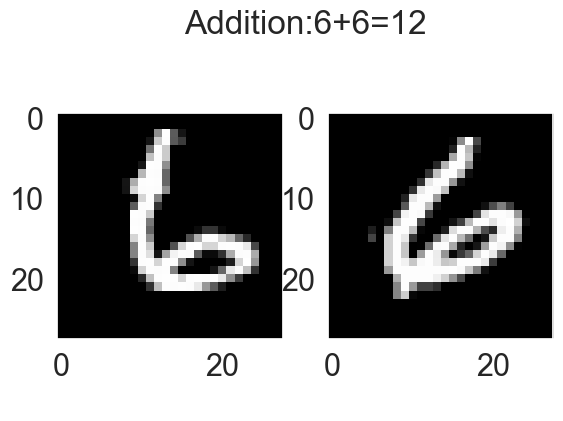

Addition:2+1=3


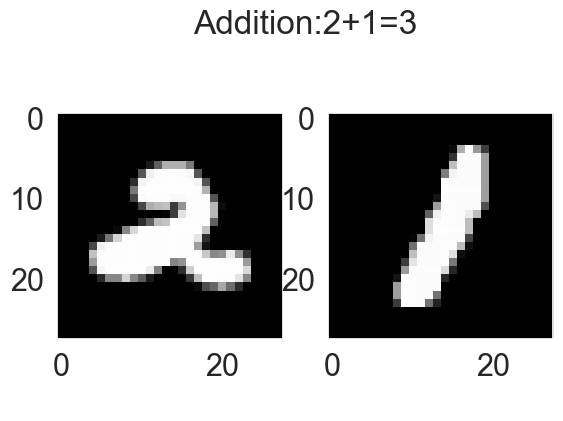

Addition:0+6=6


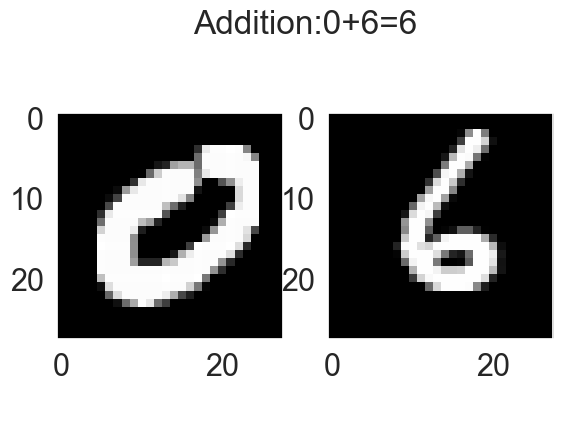

Substraction:1-1=0


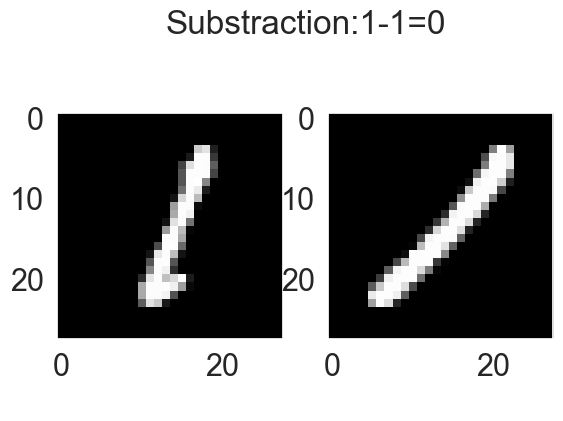

Addition:2+8=10


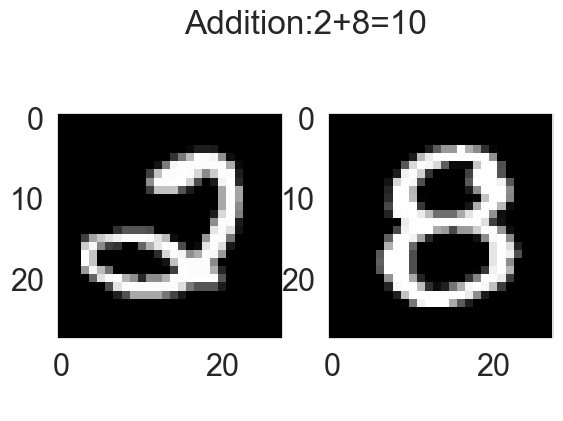

Substraction:6-8=-2


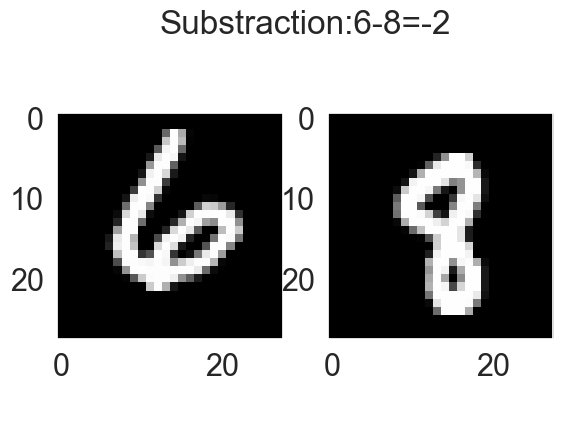

Addition:0+2=2


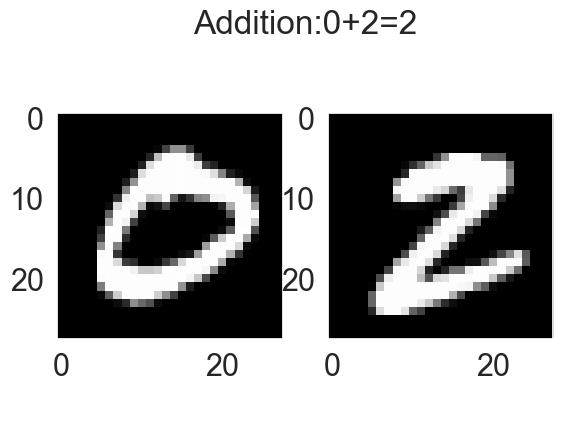

Substraction:3-3=0


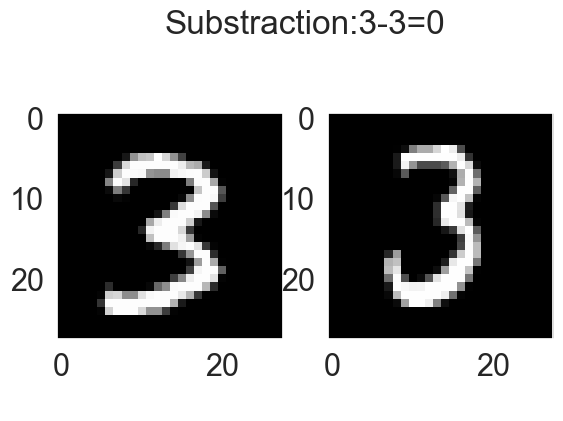

Addition:5+0=5


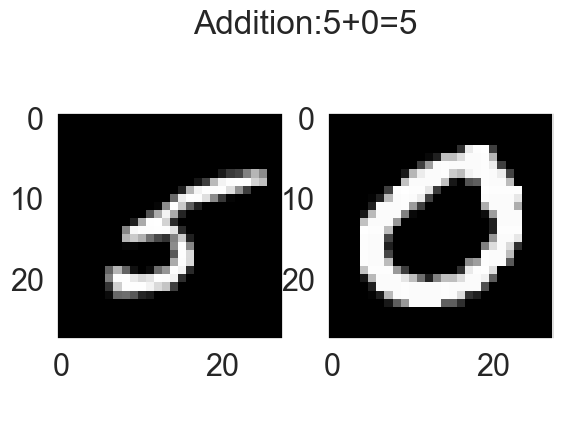

Substraction:7-7=0


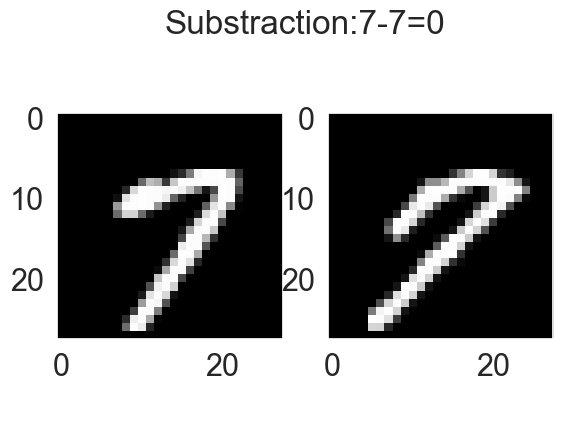

In [12]:
evaluate(trained_model, testloader, use_gpu=use_gpu)

## Error analysis - show only wrong predictions

len testloader 79
Addition:4+5=14


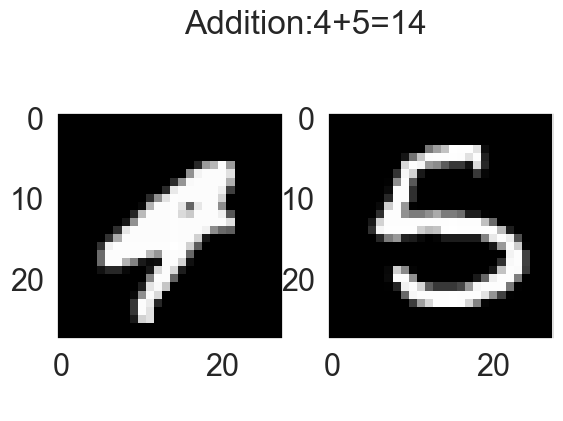

Addition:5+9=9


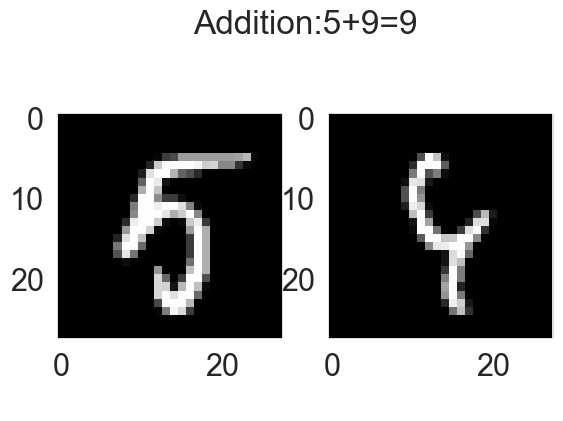

Substraction:1-5=-2


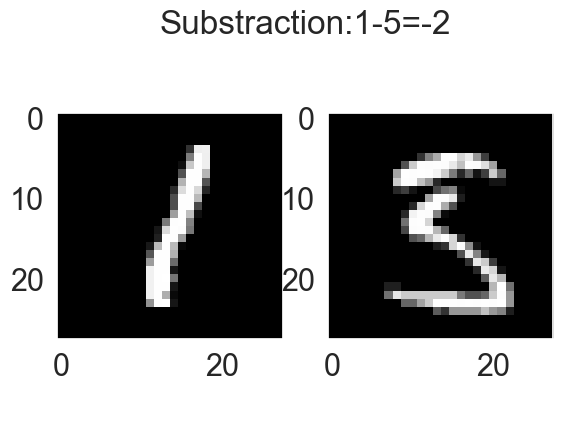

Substraction:7-0=2


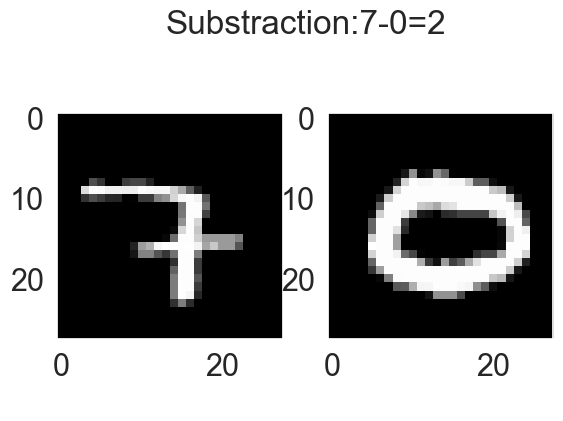

Addition:9+1=9


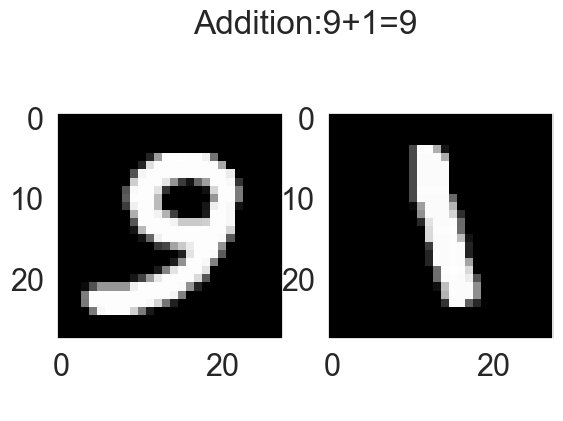

Substraction:4-8=1


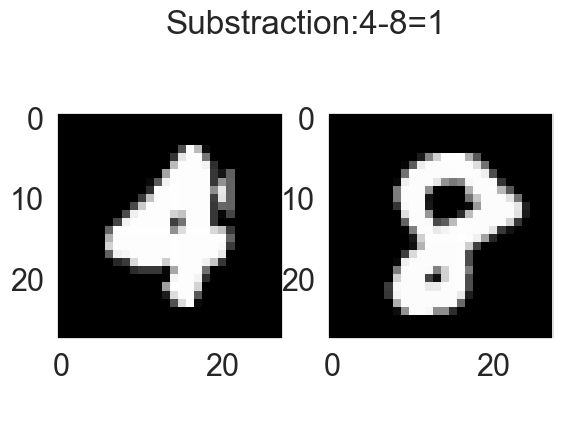

In [13]:
evaluate(trained_model, testloader, use_gpu=use_gpu, show_wrong_results_only = True)

## How to make it better?

- try out different hyperparameters
- change a way in which dataset is created on the go
